In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [16]:
# df.dtypes

In [17]:
# df.isnull().sum()

In [6]:
#dropping the unncessary column
random = df.drop(['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER'],axis=1)

In [7]:
#for clustering we required only two columns so
data = df[['QUANTITYORDERED', 'SALES']]
data = data.dropna(axis=0)
data.head()

,QUANTITYORDERED,SALES
0,30,2871.00
1,34,2765.90
2,41,3884.34
3,45,3746.70
4,49,5205.27


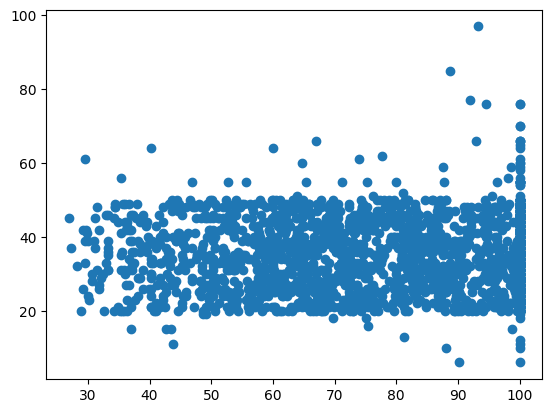

In [15]:
plt.scatter(df['PRICEEACH'],df['QUANTITYORDERED'])

## K means Clustering using Elbow Method

In [8]:
# !pip install scikit-learn matplotlib seaborn
# !pip install --upgrade scikit-learn numpy


In [9]:
import sklearn.cluster as KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [11]:
#lets find the optimal number of cluster using elbow method
wcss = [] # within cluster sum of square

for i in range(1,11):
    clustering = KMeans(n_clusters=i, init = 'k-means++', random_state=1)
    clustering.fit(scaled_data)
    wcss.append(clustering.inertia_)
    
# ks = [1,2,3,4,5,6,7,8,9,10]

# sns.lineplot(x=ks,y=wcss);
    
#plot the Elbow graph
# plt.figure(figsize=(8,6))
# plt.plot(range(1,11),wcss, marker='o',linestyle='--')
# plt.grid(True)
# plt.show()

TypeError: 'module' object is not callable